# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on= "Mouse ID", how="left" )
# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].nunique()
mice_df= pd.DataFrame({"Number of Mice": [mouse_count]})
mice_df

,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows_df = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated_rows_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
dup= merged_df.loc[merged_df.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup

array(['g989'], dtype=object)

In [6]:
duplicated_rows = merged_df.loc[merged_df["Mouse ID"]== "g989"]
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Checking the number of mice in the clean DataFrame.
corrected_data_df= merged_df[merged_df["Mouse ID"]!= "g989"]
corrected_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
mouse_count_2 = len(corrected_data_df["Mouse ID"].unique())
mice_df2 = pd.DataFrame({"Number of Mice": [mouse_count_2]})
mice_df2

,Number of Mice
0,248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_gb= corrected_data_df.groupby(["Drug Regimen"])
mean_dr= drug_regimen_gb.mean()["Tumor Volume (mm3)"]
mean_dr
median_dr= drug_regimen_gb.median()["Tumor Volume (mm3)"]
median_dr
var_dr= drug_regimen_gb.var()["Tumor Volume (mm3)"]
var_dr
std_dr= drug_regimen_gb.std()["Tumor Volume (mm3)"]
sem_dr= drug_regimen_gb.sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean":mean_dr, "Median":median_dr,"Variance":var_dr,"Standard Deviation":std_dr, "SEM":sem_dr})
summary_df


/var/folders/1f/1r5ycw992w59z1gnm3x14qdc0000gn/T/ipykernel_2102/4225264124.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_dr= drug_regimen_gb.mean()["Tumor Volume (mm3)"]
/var/folders/1f/1r5ycw992w59z1gnm3x14qdc0000gn/T/ipykernel_2102/4225264124.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_dr= drug_regimen_gb.median()["Tumor Volume (mm3)"]
/var/folders/1f/1r5ycw992w59z1gnm3x14qdc0000gn/T/ipykernel_2102/4225264124.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numer

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Counts')

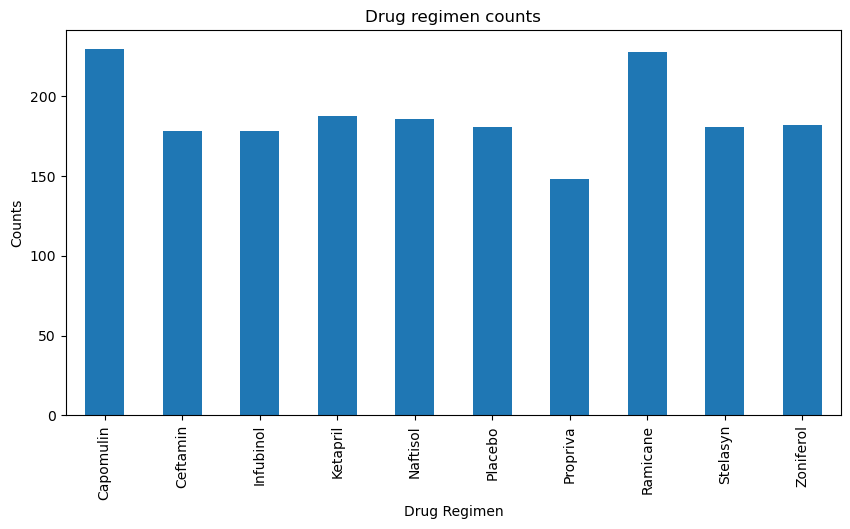

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_dr = drug_regimen_gb.count()["Mouse ID"]
count_chart= count_dr.plot(kind= "bar", figsize=(10,5))
plt.title("Drug regimen counts")
count_chart.set_ylabel("Counts")


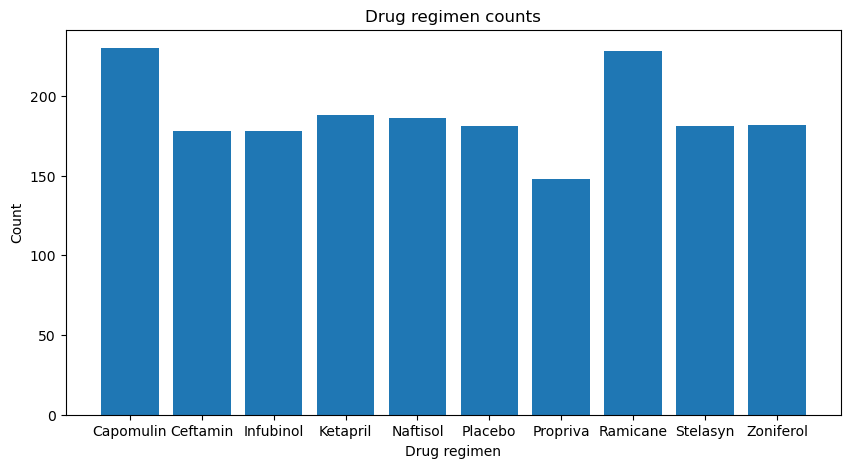

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimens_pp= summary_df.index.tolist()
drug_regimens_pp
reg_count =(corrected_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
reg_count
plt.figure(figsize=(10,5))
plt.bar(drug_regimens_pp, reg_count, align= "center")
plt.title("Drug regimen counts")
plt.ylabel("Count")
plt.xlabel("Drug regimen")
plt.show()


Text(0.5, 1.0, 'mice counts')

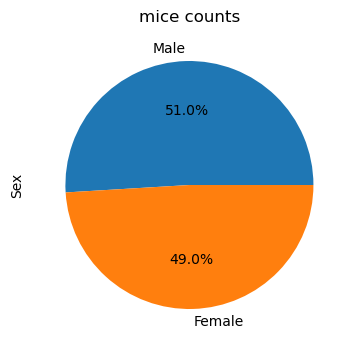

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex =corrected_data_df["Sex"].value_counts()

mice_sex.plot(kind= 'pie', figsize =(4,8),autopct="%1.1f%%")
plt.title("mice counts")


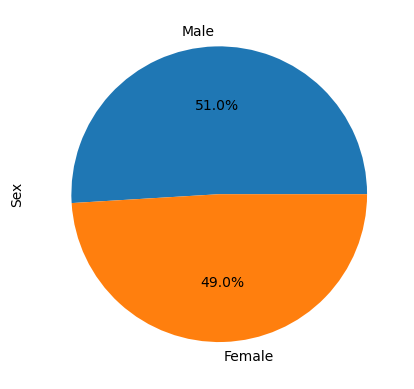

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0,0)
plt.pie(mice_sex.values, explode=explode, labels=mice_sex.index.values, autopct="%1.1f%%", startangle=360)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
selected_regimens = corrected_data_df.loc [(corrected_data_df["Drug Regimen"] == "Capomulin")
                                            | (corrected_data_df["Drug Regimen"] == "Ramicane")
                                            | (corrected_data_df["Drug Regimen"] == "Infubinol") 
                                            | (corrected_data_df["Drug Regimen"] == "Ceftamin"), :]                                                       



max_df = corrected_data_df.groupby("Mouse ID").max()["Timepoint"]
max_df =max_df.reset_index()
max_df

final_merged_df= max_df.merge(corrected_data_df, on=["Mouse ID", "Timepoint"], how= "left")
final_merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:

# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumordata_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = final_merged_df.loc[final_merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumordata_list.append(tumor)
 


    # Determine outliers using upper and lower bounds
    # Calculate quartiles, IQR, and identify potential outliers for each regimen.
    quartiles = tumor.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    higher_q = quartiles[0.75]
    iqr= higher_q - lower_q
    print(drug)
    print(f"the lower quartiles is: {lower_q}")
    print(f"the higher quartiles is: {higher_q}")      
    print(f"the IQR is:{iqr}")
    
    lower_b = lower_q - (1.5*iqr)
    upper_b = higher_q + (1.5*iqr)
    print(f"the lower bound is: {lower_b}")
    print(f"the upper bound is: {upper_b}")
    print("###############################################")


Capomulin
the lower quartiles is: 32.37735684
the higher quartiles is: 40.1592203
the IQR is:7.781863460000004
the lower bound is: 20.70456164999999
the upper bound is: 51.83201549
###############################################
Ramicane
the lower quartiles is: 31.56046955
the higher quartiles is: 40.65900627
the IQR is:9.098536719999998
the lower bound is: 17.912664470000003
the upper bound is: 54.30681135
###############################################
Infubinol
the lower quartiles is: 54.04860769
the higher quartiles is: 65.52574285
the IQR is:11.477135160000003
the lower bound is: 36.83290494999999
the upper bound is: 82.74144559000001
###############################################
Ceftamin
the lower quartiles is: 48.72207785
the higher quartiles is: 64.29983003
the IQR is:15.577752179999997
the lower bound is: 25.355449580000002
the upper bound is: 87.66645829999999
###############################################


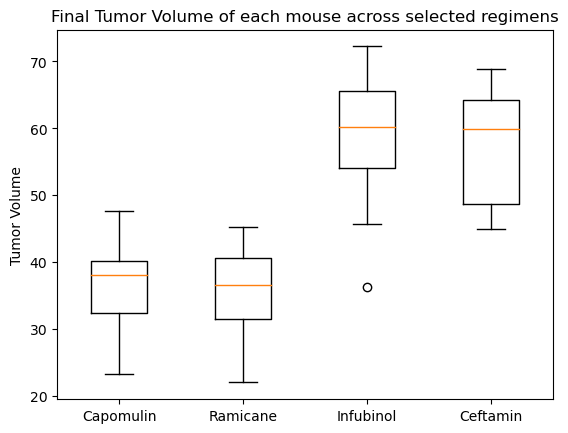

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each mouse across selected regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumordata_list, labels = treatments )

plt.show()


## Line and Scatter Plots

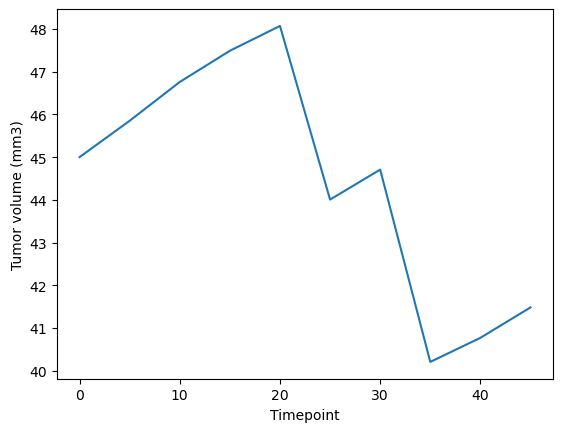

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomuline_data = corrected_data_df[( corrected_data_df["Drug Regimen"] == "Capomulin")& (corrected_data_df["Mouse ID"]== "l509")]
capomuline_data_gb = capomuline_data.groupby(["Drug Regimen", "Timepoint"])

capomuline_data_df = capomuline_data_gb["Tumor Volume (mm3)"].mean().to_frame()
capomuline_data_df
capomuline_data_index= capomuline_data_df.unstack(0)
capomuline_data_plot = capomuline_data_index["Tumor Volume (mm3)"]

x_axis = [0,5,10,15,20,25,30,35,40,45]

plt.figure()
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("Timepoint")

plot_cap, = plt.plot(x_axis, capomuline_data_plot["Capomulin"] )


In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterplot_data = corrected_data_df[(corrected_data_df["Drug Regimen"] == "Capomulin")]
scatterplot_df = scatterplot_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatterplot_gb = scatterplot_df.groupby(["Mouse ID", "Weight (g)"])
scatterplot_gb
scatterplot_table = scatterplot_gb["Tumor Volume (mm3)"].mean().to_frame()
scatterplot_table= scatterplot_table.reset_index()
scatterplot_table.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


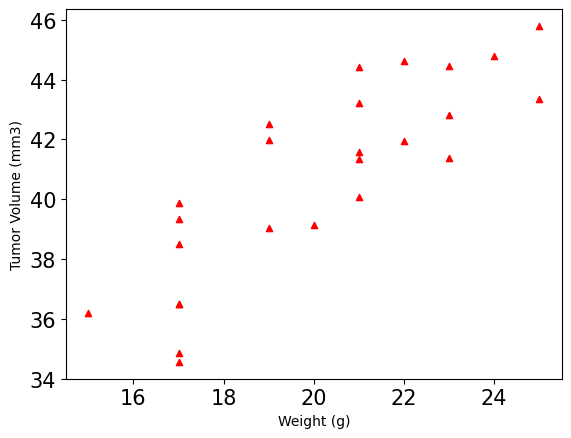

In [25]:
scatterplot_table.plot(x="Weight (g)", y= "Tumor Volume (mm3)", kind= "scatter", fontsize=15, marker= "^", color= "r",)
plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterplot_table["Weight (g)"], scatterplot_table["Tumor Volume (mm3)"])
print(f'correlation for mouse weight and average tumor volume for the Capomulin regimen is: {correlation}')


correlation for mouse weight and average tumor volume for the Capomulin regimen is: PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


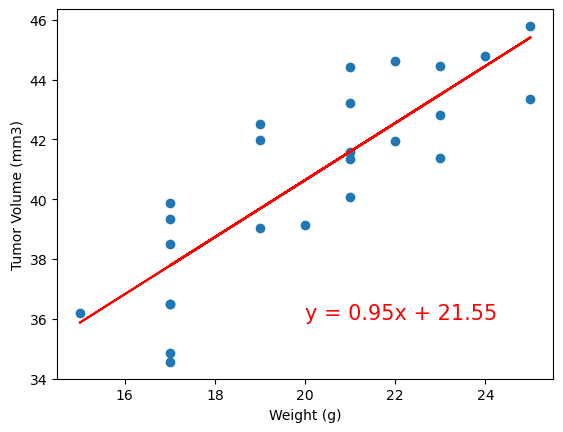

In [27]:
x_values = scatterplot_table["Weight (g)"]
y_values = scatterplot_table["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()